## Marriage - What is it Good For? 

## Questions

### Comparing Demographics 
1. What are the disparities in marriage rates across...
a - Education levels? 
b - Wealth levels? 
c - Race? 
2. How have these changed over time? 

### Historical Trends 
1. It's obvious that marriage rates have declined over time. But across which groups has the biggest hit been seen? 

In [47]:
import pandas as pd
import numpy as np
import math
% matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import scipy.stats  as stats

#https://github.com/fivethirtyeight/data/tree/master/marriage has a guide for keys


'''Keys guide for the dataframes.
HS = High school or less
SC = Some college
BAo = Bachelor's only
BAp = Bachelor's plus 
GD = Graduate degree 
White = White
Black = Black
Hisp = Hispanic
NE = Northeast
MA = Mid-Atlantic
Midwest, South, Mountain, Pacific
work = Employed 50+ weeks year prior 
nowork = NOT(work)
poor, mid, rich = [0-25], [25-75], [75-100] percentiles of family income.'''

'''Data on divorce measured at every decade from 1960-2000, then every year from 2001-2012.'''
divorce_df = pd.read_csv('data/divorce.csv', index_col=1).drop(['Unnamed: 0', 'date'], 1)
pd.to_numeric(divorce_df.index.values)

'''Figures in each cell are the share of that population that has never been married.'''
men_df = pd.read_csv('data/men.csv', index_col=1).drop(['Unnamed: 0', 'date'], 1)

'''Figures in each cell are the share of that population that has never been married.'''
women_df = pd.read_csv('data/women.csv', index_col=1).drop(['Unnamed: 0', 'date'], 1)

'''Figures in each cell are the share of that population that has never been married.'''
both_sexes_df = pd.read_csv('data/both_sexes.csv', index_col=1).drop(['Unnamed: 0', 'date'], 1)

'''To save us multiple calls. Each dataset was measured in the exact same set of years. This array
of year values will be the x-axis argument for many plots.'''
years_tracked = both_sexes_df.index.values

### Marriage Rates Over Time

While marriage rates have declined overall, 25-34 year olds account for an outsize share of this decline. They're marrying later in life.

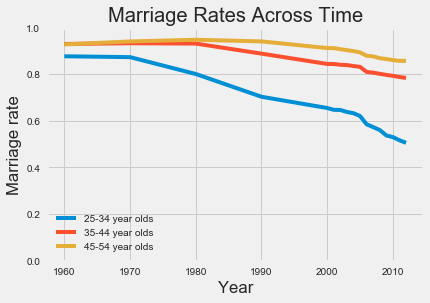

In [56]:
ax = plt.subplot()
ax.plot(years_tracked, 1 - both_sexes_df['all_2534'], label='25-34 year olds')
ax.plot(years_tracked, 1 - both_sexes_df['all_3544'], label='35-44 year olds')
ax.plot(years_tracked, 1 - both_sexes_df['all_4554'], label='45-54 year olds')
ax.set_title('Marriage Rates Across Time')
ax.set_ylim(0, 1)
ax.set_xlabel('Year')
ax.set_ylabel('Marriage rate')
#ax.title('Marriage rate decline across age groups')
ax.legend()
plt.show()

### Marriage Rates Over Time and Race

Interestingly, white and hispanic rates closely track one another while blacks' marriage rates decline really harshly.

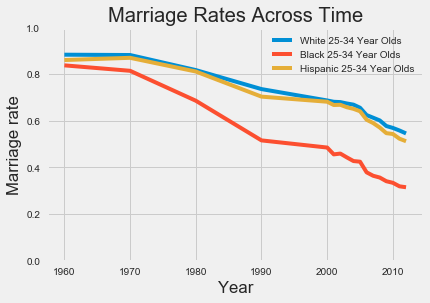

In [58]:
fig = plt.figure(figsize=[15, 1])
bob = plt.subplot()
bob.plot(years_tracked, 1 - both_sexes_df['White_2534'], label='White 25-34 Year Olds')
bob.plot(years_tracked, 1 - both_sexes_df['Black_2534'], label='Black 25-34 Year Olds')
bob.plot(years_tracked, 1 - both_sexes_df['Hisp_2534'], label='Hispanic 25-34 Year Olds')
bob.set_title('Marriage Rates Across Race')
bob.set_ylim(0, 1)
bob.set_xlabel('Year')
bob.set_ylabel('Marriage rate')
#ax.title('Marriage rate decline across age groups')
bob.legend()
plt.show()

/Users/akhiljalan/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


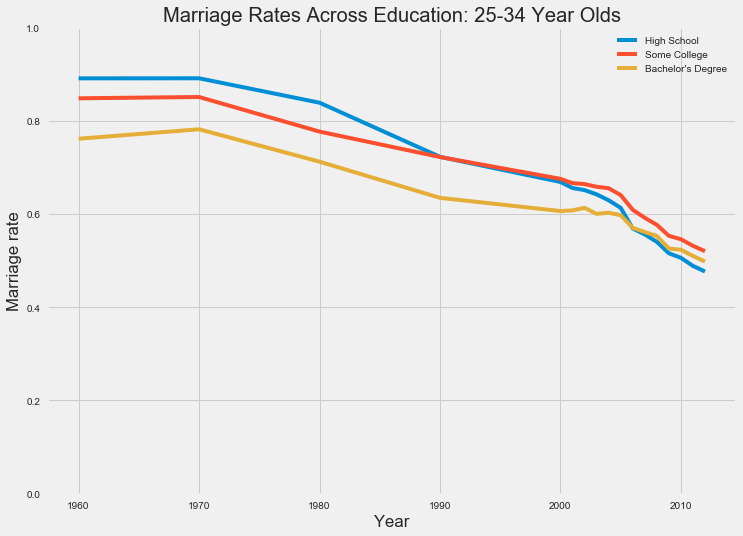

In [64]:
fig = plt.figure(figsize=[11, 8])
educ_ax = plt.subplot()
educ_ax.plot(years_tracked, 1 - both_sexes_df['HS_2534'], label='High School')
educ_ax.plot(years_tracked, 1 - both_sexes_df['SC_2534'], label='Some College')
educ_ax.plot(years_tracked, 1 - both_sexes_df['BAo_2534'], label='Bachelor\'s Degree')
#educ_ax.plot(years_tracked, 1 - both_sexes_df['BAp_2534'], label='Bachelor\'s or more')
educ_ax.set_title('Marriage Rates Across Education: 25-34 Year Olds')
educ_ax.set_ylim(0, 1)
educ_ax.set_xlabel('Year')
educ_ax.set_ylabel('Marriage rate')
#ax.title('Marriage rate decline across age groups')
educ_ax.legend()
fig.show()

## Footnotes 

All data courtesy of FiveThirtyEight.